In [2]:
import sys
sys.path.append('/Users/macuser/Documents/trading/cryptobot/features')
import dataset, calendar_util

<Axes: >

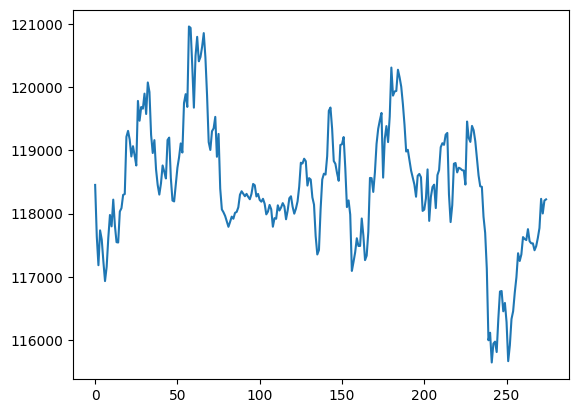

In [64]:
df.high.plot()

In [70]:
from indicators import Indicators
import dataloader
import pandas as pd
import cacher
from datetime import datetime, timedelta
import numpy as np

def multiday_data(symbol, enddate, freq):
    totalcandles = 0
    dflist = []
    while(totalcandles < 252):
        df = dataloader.compute(symbol, enddate, freq)
        if df is not None:
            dflist.insert(0,df)
            totalcandles = totalcandles + len(df)
        enddate = enddate - timedelta(1)
        if enddate.year == 2020:
            return None
    return pd.concat(dflist)

def compute_featires_from_indicator(symbol, date_tm, freq):
    df = multiday_data(symbol, date_tm, freq)
    df.reset_index(drop = True, inplace = True)
    df = df.sort_values("timestamp").reset_index(drop=True)
    ema_list = [7,14,21,44,50,63,100, 132, 200, 256]
    for ema in ema_list:
        df = Indicators.ema(df, ema)
    for length, multi in [(10,3), (15,1), (10, 2), (8,2), (8,3)]:
        df = Indicators.supertrend(df, length, multi)
    df = Indicators.vwap(df)
    df = Indicators.rsi(df, 14)
    df = Indicators.macd(df)
    df = df.dropna()
    maincolumns = ['timestamp'	,'open',	'high',	'low', 'close',	'volume']	
    for col in df.columns:
        if col in maincolumns or 'rsi' in col:
            continue
        df[col] = (df[col] - df['close'])/ df['close']
    
    df = df.tail(1)
    df.reset_index(drop = True, inplace = True)
    return df 

/Users/macuser/Documents/trading/cryptobot/features/indicators.py:26: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data[colname] = ta.vwap(data['high'], data['low'], data['close'], data['volume'])


In [71]:
df

,timestamp,open,high,low,close,volume,ema_7,ema_14,ema_21,ema_44,...,ema_200,ema_256,supertrend_10_3,supertrend_15_1,supertrend_10_2,supertrend_8_2,supertrend_8_3,vwap,rsi_14,macd
0,2025-07-26 19:00:00+05:30,118068.5,118225.0,118068.5,118139.0,60993,-0.002264,-0.004326,-0.005756,-0.006665,...,-0.00216,-0.00036,-0.008447,-0.003289,-0.005609,-0.005146,-0.007752,-0.006044,66.802104,-0.999257


,timestamp,open,high,low,close,volume,ema_7,ema_14,ema_21,ema_44,...,ema_200,ema_256,supertrend_10_3,supertrend_15_1,supertrend_10_2,supertrend_8_2,supertrend_8_3,vwap,rsi_14,macd
274,2025-07-26 19:00:00+05:30,118068.5,118225.0,118068.5,118139.0,60993,-0.002264,-0.004326,-0.005756,-0.006665,...,-0.00216,-0.00036,-0.008447,-0.003289,-0.005609,-0.005146,-0.007752,-0.006044,66.802104,-0.999257
